In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
df = pd.read_csv(r'C:\Users\devme\OneDrive\Desktop\DataAnalytics\MachineLearning\Walmart project\Walmart DataSet.csv')

In [198]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


EDA


In [232]:
df['Weekly_Sales'] = df['Weekly_Sales'].astype(int)

In [236]:
df['Fuel_Price'] = df['Fuel_Price'].round(2)

In [238]:
df['CPI'] = df['CPI'].round(2)

In [240]:
df['Unemployment'] = df['Unemployment'].round(2)

In [242]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   int32         
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int32(1), int64(2)
memory usage: 427.3 KB


In [204]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [116]:
df.duplicated().sum()

0

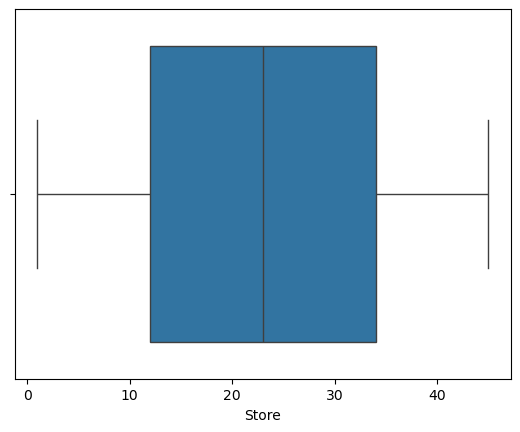

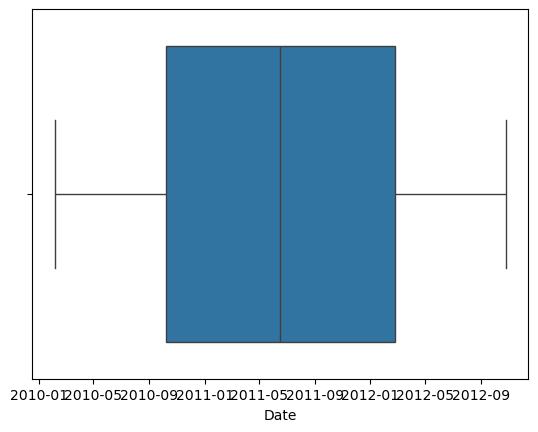

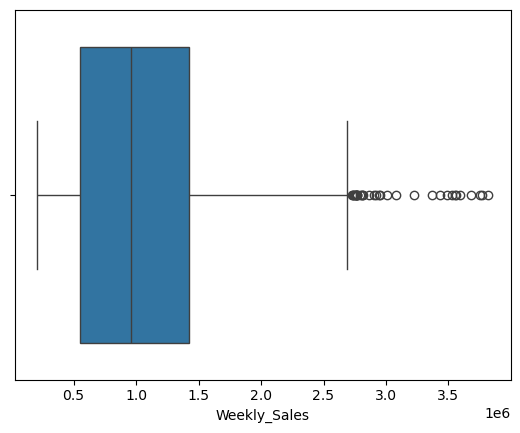

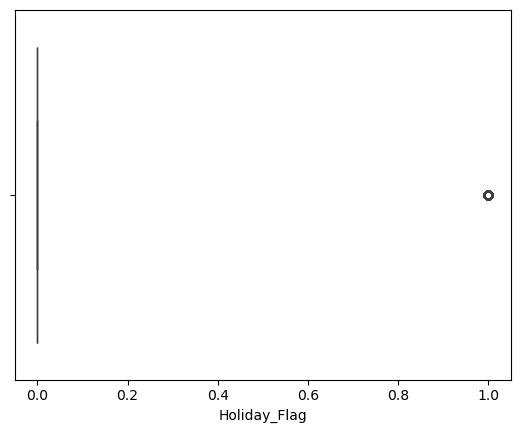

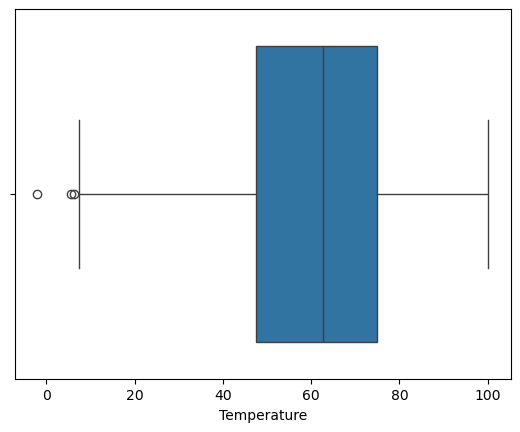

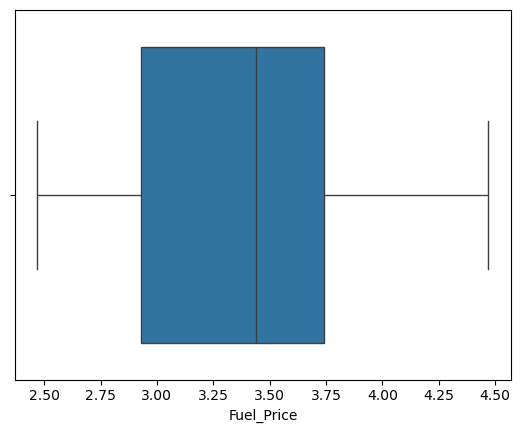

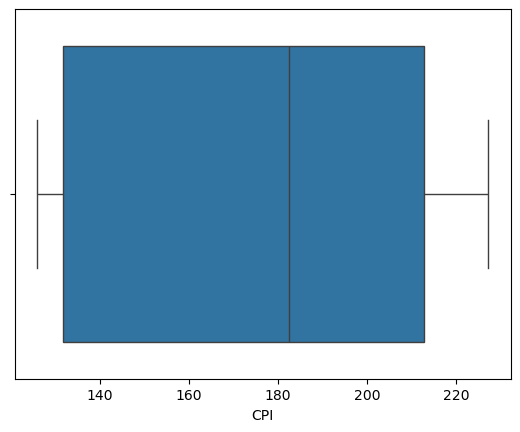

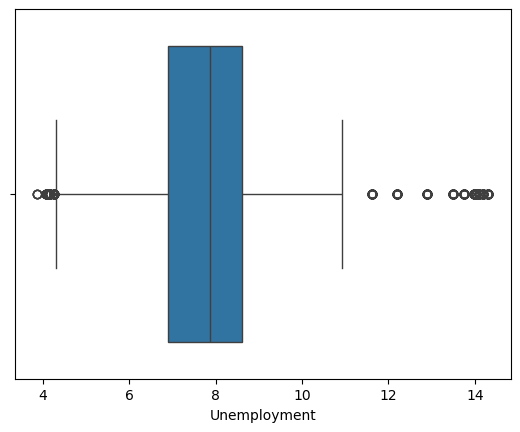

In [246]:
for col in df.columns:
    if df[col].dtype!='object':
        sns.boxplot(data=df,x=col)
        plt.show()

In [258]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690,0,42.31,2.57,211.10,8.11
1287,10,2010-02-05,2193048,0,54.34,2.96,126.44,9.76
5148,37,2010-02-05,536006,0,45.97,2.57,209.85,8.55
2288,17,2010-02-05,789036,0,23.11,2.67,126.44,6.55
4147,30,2010-02-05,465108,0,39.05,2.57,210.75,8.32
...,...,...,...,...,...,...,...,...
3574,25,2012-10-26,688940,0,56.69,3.88,216.15,7.29
714,5,2012-10-26,319550,0,71.70,3.51,224.04,5.42
5719,40,2012-10-26,921264,0,49.65,3.92,138.73,4.14
2573,18,2012-10-26,1127516,0,56.09,3.92,138.73,8.24


In [260]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   int32         
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int32(1), int64(2)
memory usage: 427.3 KB


a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?

In [264]:
df[['Weekly_Sales', 'Unemployment']].corr()


,Weekly_Sales,Unemployment
Weekly_Sales,1.000000,-0.106198
Unemployment,-0.106198,1.000000


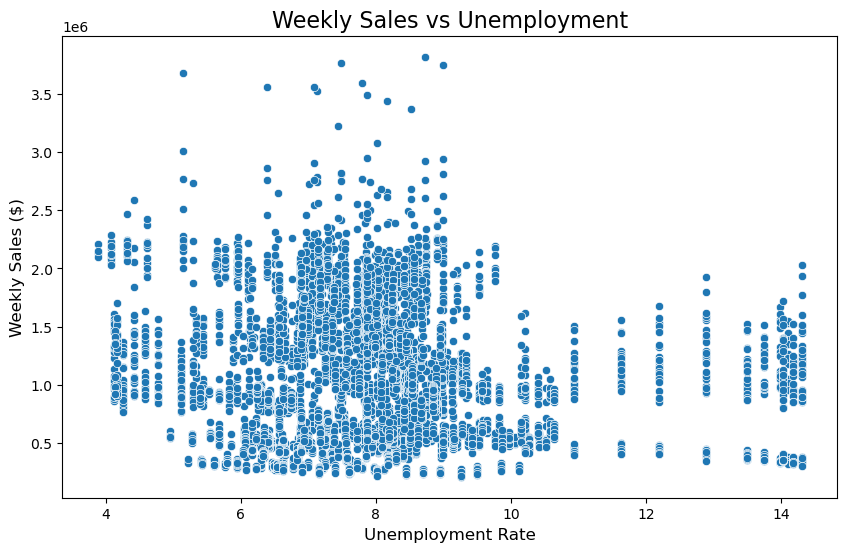

In [266]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df)

# Add title and labels
plt.title('Weekly Sales vs Unemployment', fontsize=16)
plt.xlabel('Unemployment Rate', fontsize=12)
plt.ylabel('Weekly Sales ($)', fontsize=12)

# Show the plot
plt.show()

Conclusion:
Unemployment has a very weak negative correlation with Weekly Sales. 
The correlation score of -0.-0.106198 indicates that, while there is a slight inverse relationship, it is not strong enough to suggest that Unemployment significantly affects Weekly Sales.
This weak relationship suggests that Unemployment has a minimal impact on Weekly Sales across the dataset.

b. If the weekly sales show a seasonal trend, when and what could be the reason?

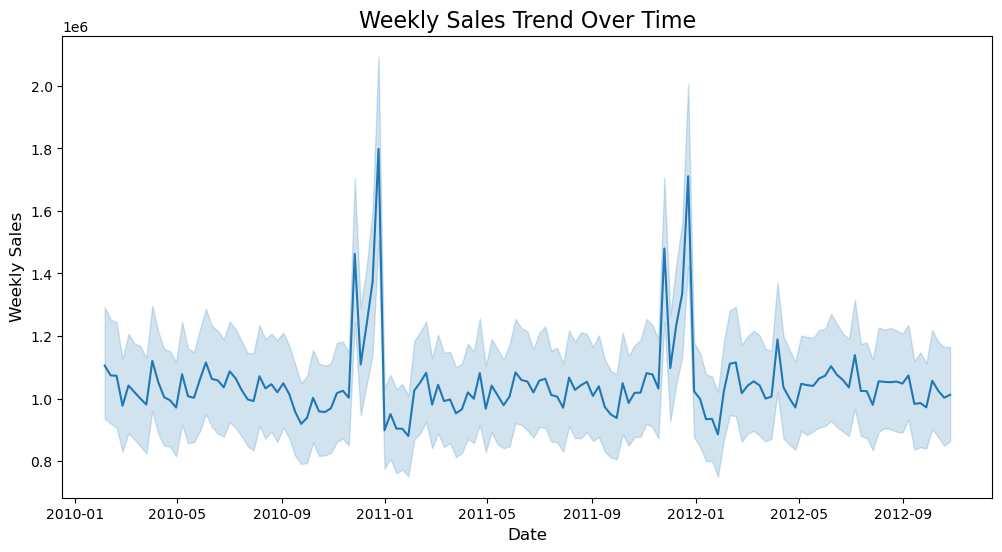

In [268]:
df = df.sort_values('Date')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=df)

plt.title('Weekly Sales Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)

plt.show()

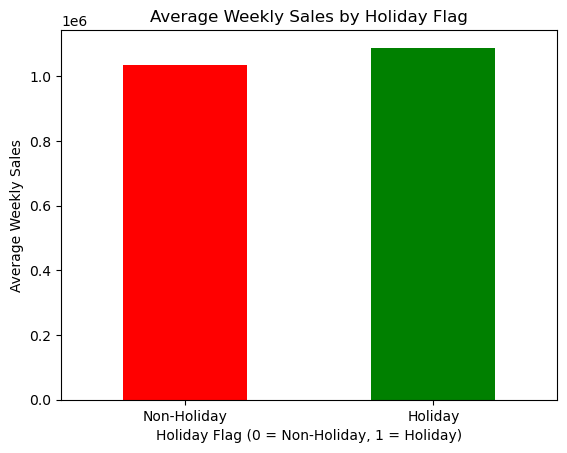

In [166]:
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

holiday_sales.plot(kind='bar', color=['red', 'green'])
plt.title('Average Weekly Sales by Holiday Flag')
plt.xlabel('Holiday Flag (0 = Non-Holiday, 1 = Holiday)')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

Yes the weekly sales show a seasonal trend
Every Yearend the sales increases due to holidays.
People spend more on year end weeks due to holidays


c. Does temperature affect the weekly sales in any manner?


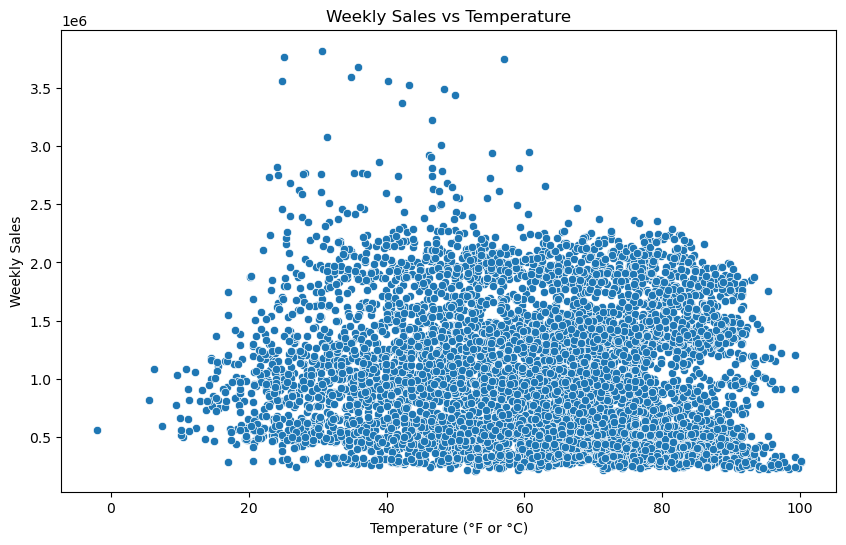

In [270]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature (°F or °C)')
plt.ylabel('Weekly Sales')
plt.show()

In [272]:
df['Weekly_Sales'].corr(df['Temperature'])


-0.06381002392756027

Conclusion:
The correlation score of -0.0638 indicates that Temperature has an extremely weak negative effect on Weekly Sales. This weak relationship suggests that Temperature does not significantly affect Weekly Sales.

Temperature may have some minor effect on sales, but it is not strong enough to be considered a significant factor affecting sales. Other variables likely play a much larger role in influencing Weekly Sales.

d. How is the Consumer Price index affecting the weekly sales of various stores?

In [274]:
df['Weekly_Sales'].corr(df['CPI'])

-0.07263449338080458

In [276]:
df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['CPI']))

C:\Users\devme\AppData\Local\Temp\ipykernel_52036\529481845.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['CPI']))


Store
1     0.225529
2    -0.062513
3     0.317216
4     0.351046
5     0.308206
6    -0.011257
7     0.288940
8     0.120346
9     0.294802
10   -0.115469
11    0.069682
12    0.084056
13    0.163874
14   -0.419808
15   -0.174377
16    0.124205
17    0.348480
18   -0.193418
19   -0.155267
20    0.058751
21   -0.163712
22   -0.038518
23    0.084265
24   -0.013617
25   -0.010874
26    0.131985
27   -0.213030
28   -0.096026
29   -0.072413
30   -0.298197
31    0.132772
32    0.196623
33   -0.052386
34    0.115313
35   -0.424038
36   -0.915069
37    0.244463
38    0.812788
39    0.428019
40    0.113330
41    0.392175
42    0.360661
43   -0.285594
44    0.740026
45   -0.023639
dtype: float64

The relationship between CPI and Weekly Sales is store-specific:

Some stores experience a positive relationship between CPI and sales.
Other stores experience a negative relationship, where sales drop as CPI rises.
Many stores show weak or no relationship between the two variables.
This analysis suggests that CPI affects weekly sales differently for each store, and this impact may depend on factors like product type, price sensitivity, and the customer base.


e. Top performing stores according to the historical data

In [282]:
store_total_sales = df.groupby('Store')['Weekly_Sales'].sum()

top_stores_total_sales = store_total_sales.sort_values(ascending=False)
top_stores_df = top_stores_total_sales.reset_index()
top_stores_df.head()

,Store,Weekly_Sales
0,20,301397719
1,4,299543881
2,14,288999841
3,13,286517633
4,2,275382373


In [292]:
store_total_sales = df.groupby('Store')['Weekly_Sales'].sum()

# Sort stores by total sales in descending order
sorted_stores_sales = store_total_sales.sort_values(ascending=False)

# Identify the highest performing store (max sales)
highest_store = sorted_stores_sales.head(1)
highest_store_name = highest_store.index[0]  # Store number
highest_sales = highest_store.values[0]  # Total weekly sales

# Identify the worst performing store (min sales)
lowest_store = sorted_stores_sales.tail(1)
lowest_store_name = lowest_store.index[0]  # Store number
lowest_sales = lowest_store.values[0]  # Total weekly sales

# Calculate the difference between the highest and lowest performing stores
performance_difference = highest_sales - lowest_sales

# Create a DataFrame to show the results
result_df = pd.DataFrame({
    'Store': [highest_store_name, lowest_store_name],
    'Total_Weekly_Sales': [highest_sales, lowest_sales]
})

# Add the performance difference as a new row
result_df.loc['Performance Difference'] = ['-', performance_difference]

# Display the result DataFrame
print(result_df)

                       Store  Total_Weekly_Sales
0                         20           301397719
1                         33            37160150
Performance Difference     -           264237569
